In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp 
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import IPython
from IPython import display
from IPython.display import display
import datetime
from datetime import datetime
from dateutil.parser import parse
from time import time
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
from scipy.spatial.distance import pdist
from mlxtend.frequent_patterns import apriori, association_rules 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import DBSCAN

scikit-learn version: 0.22.1


In [171]:
bank_of_taiwan = pd.read_excel("C:/Users/MSI/Desktop/Python/Projet/bankoftaiwan.xls",header=1)

In [172]:
%matplotlib inline

<p style="color:#FF0000" ;> <font  size="5"> 1- Data understanding  </font> </p>

#### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#### X2: Gender (1 = male; 2 = female). 
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#### X4: Marital status (1 = married; 2 = single; 3 = others). 
#### X5: Age (year). 
#### X6 - X11: History of past payment. (September(6) -> April(11))
##### -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months
#### X12-X17: Amount of bill statement (NT dollar). 
#### X18-X23: Amount of previous payment (NT dollar). 

In [173]:
bank_of_taiwan.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [174]:
bank_of_taiwan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [175]:
bank_of_taiwan.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [176]:
bank_of_taiwan.shape

(30000, 25)

In [177]:
bank_of_taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [178]:
df_input = bank_of_taiwan.iloc[:,:-1]
target = bank_of_taiwan["default payment next month"]
target.shape

(30000,)

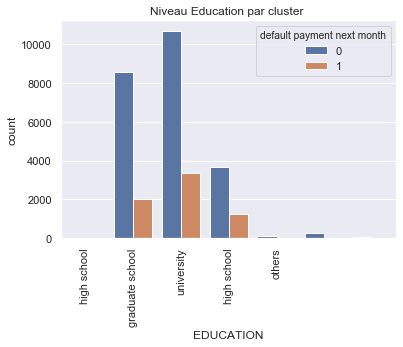

In [179]:
plt.title('Niveau Education par cluster ')
ax2 = sns.countplot(x= 'EDUCATION', hue = 'default payment next month', data = bank_of_taiwan)
ax2.set_xticklabels(['high school','graduate school','university','high school','others'],rotation = 90)
plt.show()

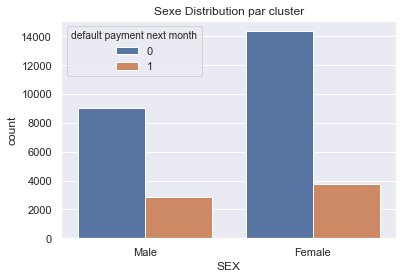

In [180]:
plt.title('Sexe Distribution par cluster')
ax3 = sns.countplot(x= 'SEX', hue = 'default payment next month', data = bank_of_taiwan)
ax3.set_xticklabels(['Male','Female'])
plt.show()

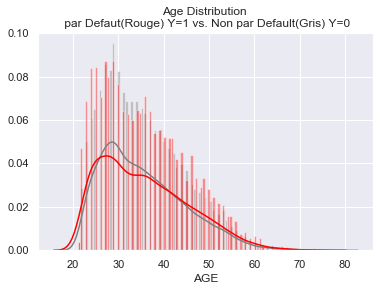

In [181]:
plt.title('Age Distribution \n par Defaut(Rouge) Y=1 vs. Non par Default(Gris) Y=0')
agedist0 = bank_of_taiwan[bank_of_taiwan['default payment next month']==0]['AGE']
agedist1 = bank_of_taiwan[bank_of_taiwan['default payment next month']==1]['AGE']
sns.distplot(agedist0, bins = 100, color = 'grey')
sns.distplot(agedist1, bins = 100, color = 'red')
plt.show()

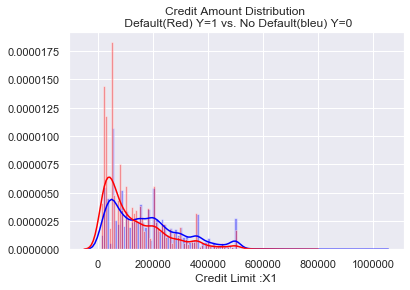

In [182]:
plt.title('Credit Amount Distribution \n Default(Red) Y=1 vs. No Default(bleu) Y=0')
cadist0 = bank_of_taiwan[bank_of_taiwan['default payment next month']==0]['LIMIT_BAL']
cadist1 = bank_of_taiwan[bank_of_taiwan['default payment next month']==1]['LIMIT_BAL']
sns.distplot(cadist0, bins = 100, color = 'Blue')
sns.distplot(cadist1, bins = 100, color = 'red')
plt.xlabel('Credit Limit :X1')
plt.show()

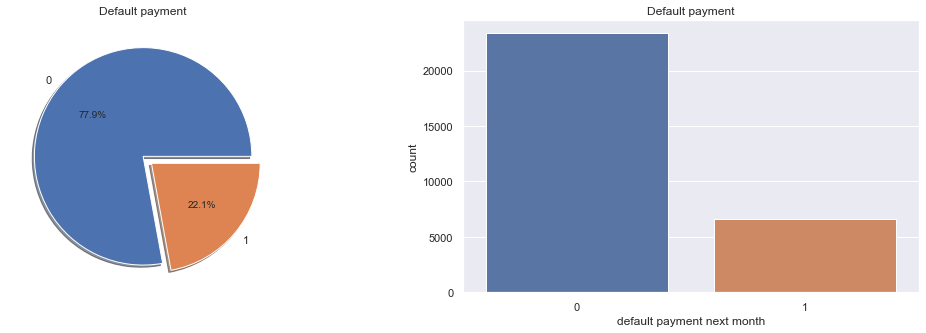

In [183]:
f,ax=plt.subplots(1,2,figsize=(18,5))
bank_of_taiwan["default payment next month"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Default payment')
ax[0].set_ylabel('')
sns.countplot("default payment next month",data=bank_of_taiwan,ax=ax[1])
ax[1].set_title('Default payment')
plt.show()

In [184]:
#pd.plotting.scatter_matrix(bank_of_taiwan,figsize=(10,10))
#plt.figure();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200C97D0D88>,
      dtype=object)

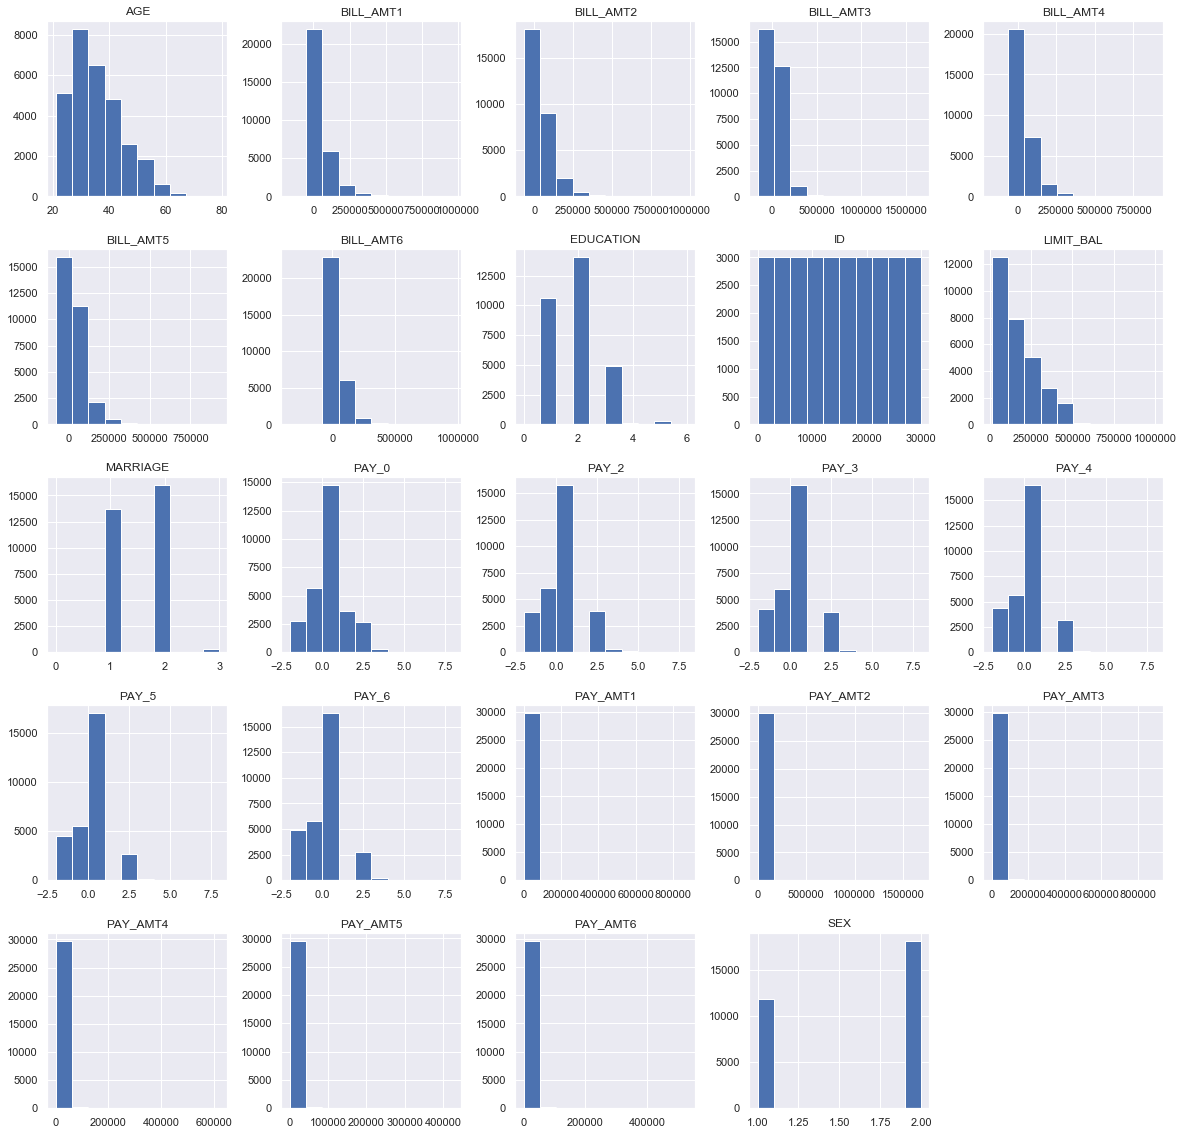

In [185]:
df_input.hist(figsize=(20,20))

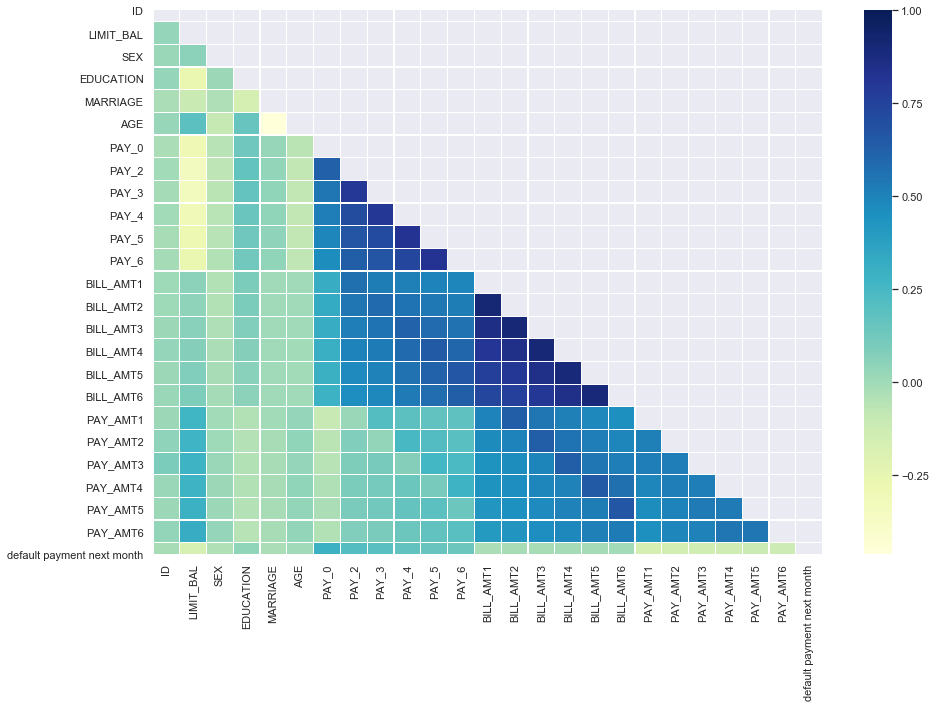

In [186]:
corr = bank_of_taiwan.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
            #annot=True, 
            fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

In [187]:
correlations = bank_of_taiwan.corr(method='spearman')["default payment next month"].sort_values(ascending=False)
correlations_abs = correlations.abs()
print('\nTop 10 correlations (absolute):\n', correlations_abs.head(11))


Top 10 correlations (absolute):
 default payment next month    1.000000
PAY_0                         0.292213
PAY_2                         0.216919
PAY_3                         0.194771
PAY_4                         0.173690
PAY_5                         0.159043
PAY_6                         0.142523
EDUCATION                     0.044369
AGE                           0.005149
BILL_AMT6                     0.000076
BILL_AMT5                     0.006851
Name: default payment next month, dtype: float64


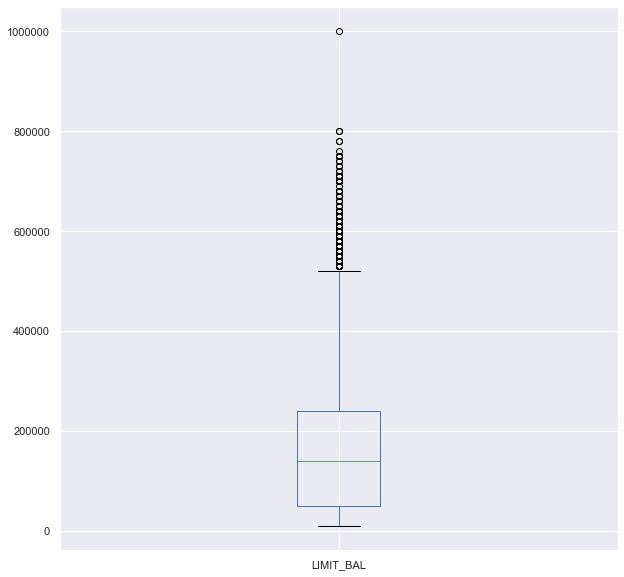

In [188]:
bank_of_taiwan.boxplot(column=["LIMIT_BAL"] , figsize=(10,10));

In [189]:
# Affichage les nombre des valeurs abérantes : IQR methode
Q1 = bank_of_taiwan["LIMIT_BAL"].quantile(0.25)
Q3 = bank_of_taiwan["LIMIT_BAL"].quantile(0.75)
IQR = Q3 - Q1
((bank_of_taiwan["LIMIT_BAL"] < (Q1 - 1.5 * IQR)) | (bank_of_taiwan["LIMIT_BAL"] > (Q3 + 1.5 * IQR))).sum()

167

In [190]:
#les Valeur aberantes pour la colonne X1 (Montant du crédit) c'est les valeurs qui sont > 550000 $ qui peuvent etre logique => il n'y a un plafond d'un crédit bancaire en taiwan selon mes recherches 
# => Pas de valeurs aberantes pour X1

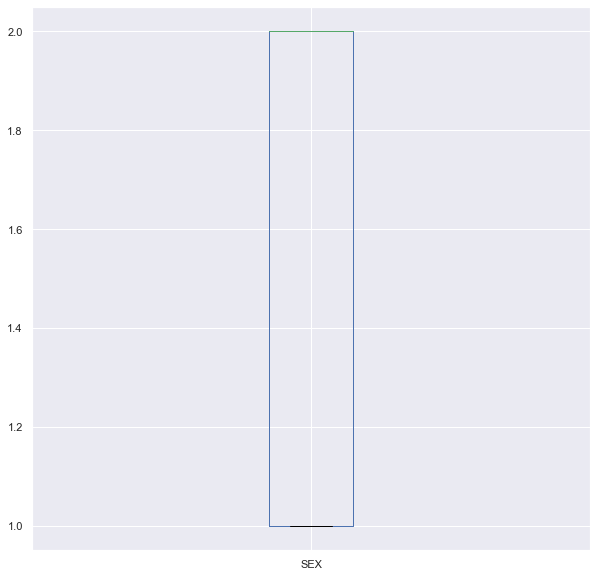

In [191]:
bank_of_taiwan.boxplot(column=["SEX"] , figsize=(10,10));

In [192]:
# => Pas de valeurs aberantes Pour X2

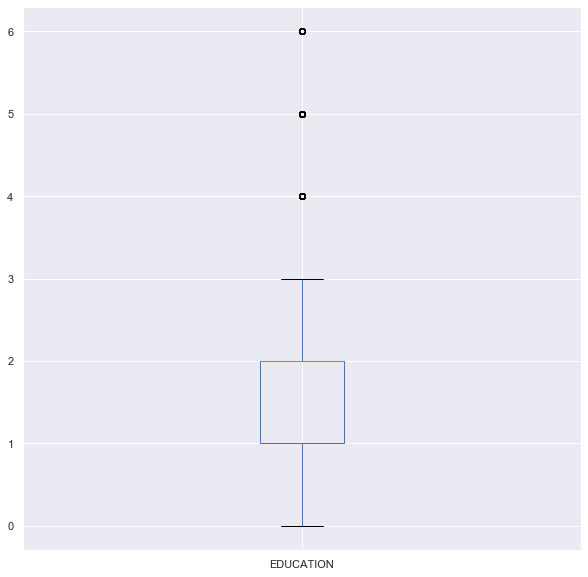

In [193]:
bank_of_taiwan.boxplot(column=["EDUCATION"] , figsize=(10,10));

In [194]:
def drop_ed(n):
    indexNames = bank_of_taiwan[ bank_of_taiwan[n] < 1 ].index
    indexNames2 = bank_of_taiwan[ bank_of_taiwan[n] > 4 ].index
    bank_of_taiwan.drop(indexNames , inplace=True)
    bank_of_taiwan.drop(indexNames2 , inplace=True)
    

In [195]:
drop_ed('EDUCATION')

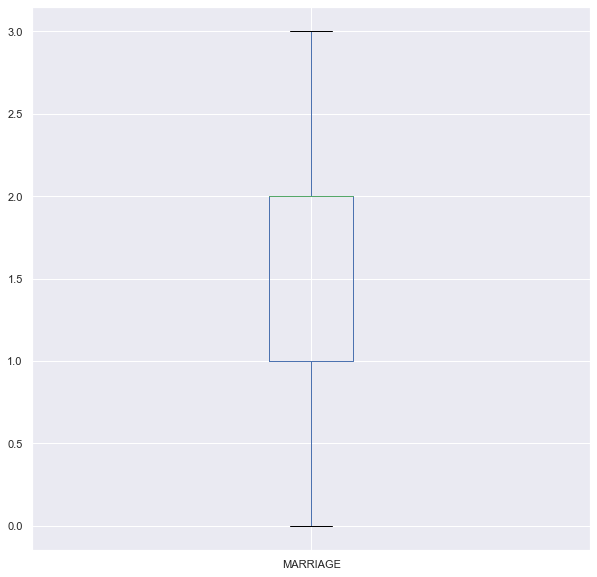

In [196]:
bank_of_taiwan.boxplot(column=["MARRIAGE"] , figsize=(10,10));

In [197]:
# => Pas de valeur abberantes pour X4

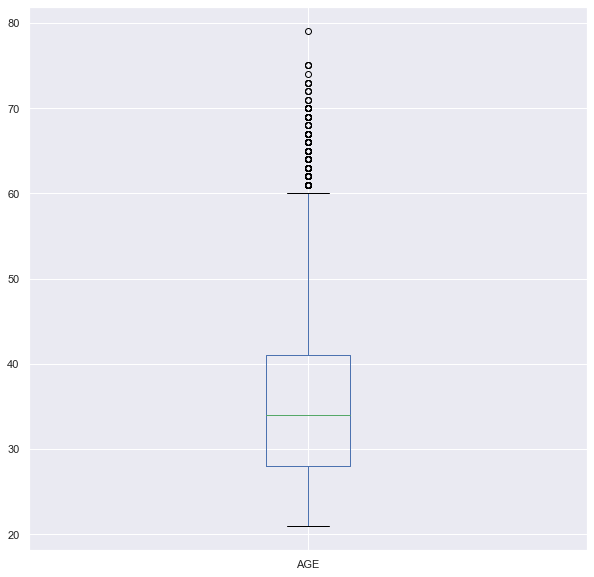

In [198]:
bank_of_taiwan.boxplot(column=["AGE"] , figsize=(10,10));

In [199]:
# => Pas de limite d'age documenté dans notre dataset

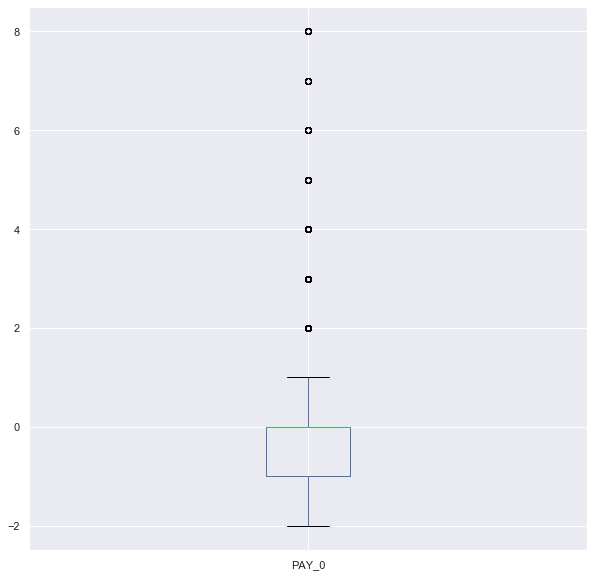

In [200]:
bank_of_taiwan.boxplot(column=["PAY_0"] , figsize=(10,10));

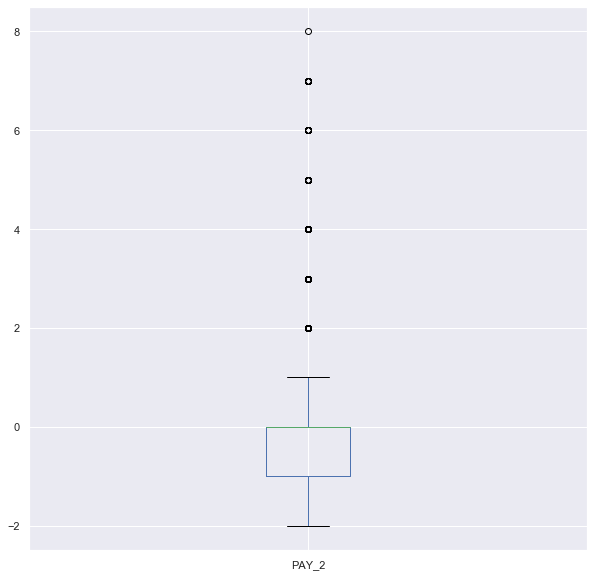

In [201]:
bank_of_taiwan.boxplot(column=["PAY_2"] , figsize=(10,10));

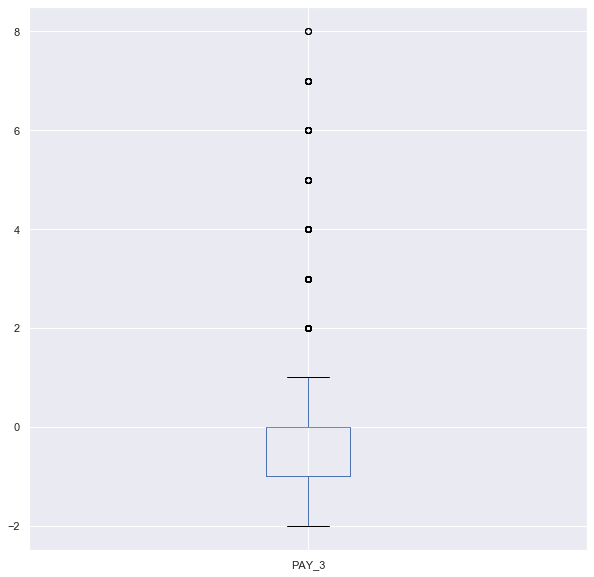

In [202]:
bank_of_taiwan.boxplot(column=["PAY_3"] , figsize=(10,10));

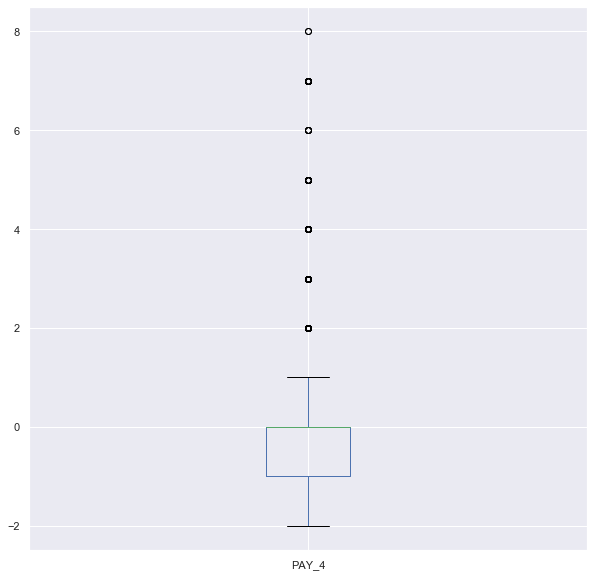

In [203]:
bank_of_taiwan.boxplot(column=["PAY_4"] , figsize=(10,10));

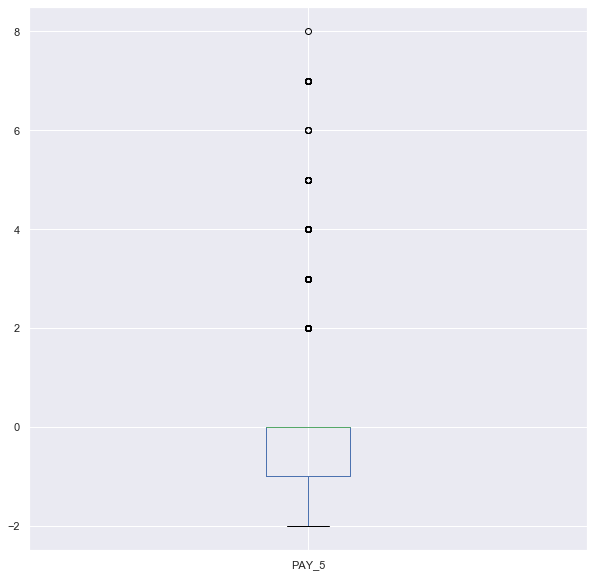

In [204]:
bank_of_taiwan.boxplot(column=["PAY_5"] , figsize=(10,10));

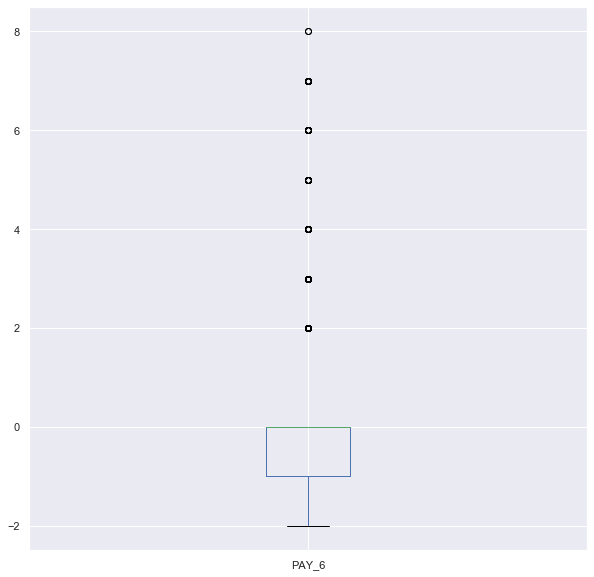

In [205]:
bank_of_taiwan.boxplot(column=["PAY_6"] , figsize=(10,10));

In [206]:
indexNames2 = bank_of_taiwan[ bank_of_taiwan['PAY_0'] > 9 ].index
indexNames2
# Liste vide

Int64Index([], dtype='int64')

In [207]:
def drop_pay(n):
    indexNames = bank_of_taiwan[ bank_of_taiwan[n] < -1 ].index
    indexNames2 = bank_of_taiwan[ bank_of_taiwan[n] > 9 ].index
    bank_of_taiwan.drop(indexNames , inplace=True)
    bank_of_taiwan.drop(indexNames2 , inplace=True)
    

In [208]:
drop_pay('PAY_0')
drop_pay('PAY_2')
drop_pay('PAY_3')
drop_pay('PAY_4')
drop_pay('PAY_5')
drop_pay('PAY_6')

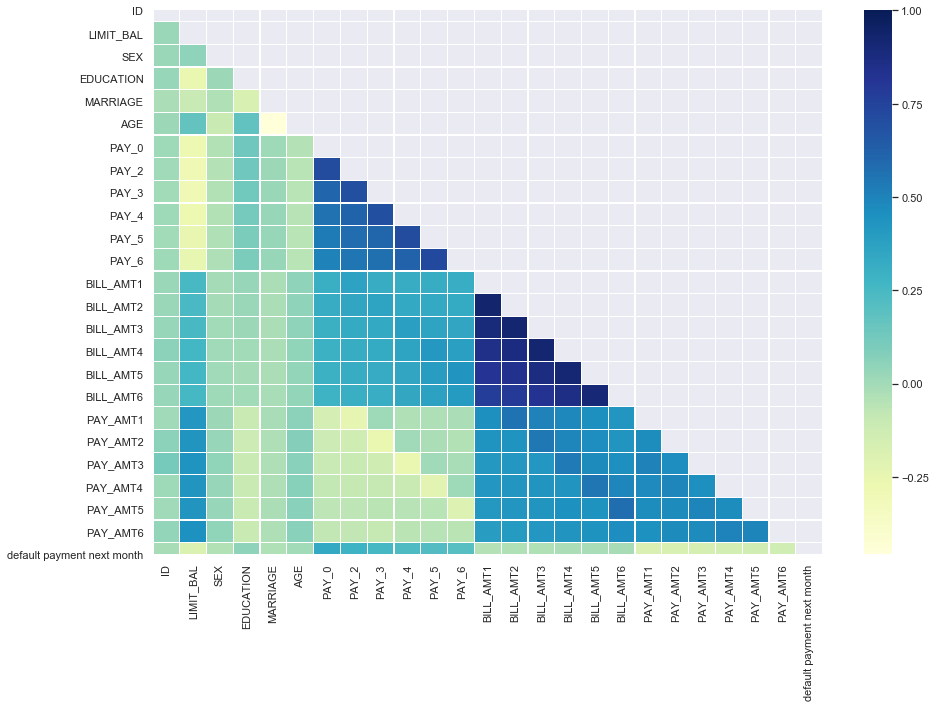

In [209]:
corr = bank_of_taiwan.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=1,
            mask=mask,
            #annot=True, 
            fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

### Le reste des variables sont des montants tout comme LIMIT_BAL, il n'y aura donc pas de valeur abérrante 

In [210]:
bank_of_taiwan.shape

(23188, 25)

In [211]:
bank_of_taiwan.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000,...,23188.000000,23188.000000,23188.000000,23188.000000,2.318800e+04,23188.000000,23188.000000,23188.000000,23188.000000,23188.000000
mean,14917.543428,156217.598758,1.591772,1.853502,1.561799,35.247585,0.180481,0.189063,0.174918,0.133431,...,53231.099750,49757.307832,47888.789288,6077.489003,6.114577e+03,5559.632267,5086.667759,5046.162196,5330.989175,0.231370
std,8615.783573,127524.173415,0.491516,0.700669,0.522180,9.291264,0.985243,1.034972,1.022761,0.989076,...,68032.436944,64311.514612,63082.398369,16913.160074,2.028712e+04,18121.546081,15533.844632,14939.594288,17288.327175,0.421717
min,2.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7489.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,9904.000000,9216.750000,7707.500000,1401.750000,1.331000e+03,1000.000000,735.750000,714.000000,628.750000,0.000000
50%,14903.500000,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,28275.500000,26358.000000,25026.000000,2590.500000,2.500000e+03,2000.000000,2000.000000,2000.000000,2000.000000,0.000000
75%,22236.250000,220000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,70166.750000,65260.500000,62193.500000,5500.000000,5.169250e+03,5000.000000,4747.500000,4678.000000,4500.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


<p style="color:#FF0000" ;> <font  size="5"> 3- ACP  </font> </p>

In [212]:
from sklearn import decomposition
from sklearn import preprocessing

In [213]:
n_comp = 24
# Selection les colonnes qu'on va travaillé avec dans l acp 
data_pca = bank_of_taiwan

In [214]:
# Préparation des données pour l'acp 
data_pca = data_pca.fillna(data_pca.mean()) # Remplacer les valeurs nul par la moyenne

#Transformer data_pca de panda ---> numpy
X= data_pca.values
X

array([[     2, 120000,      2, ...,      0,   2000,      1],
       [     3,  90000,      2, ...,   1000,   5000,      0],
       [     4,  50000,      2, ...,   1069,   1000,      0],
       ...,
       [ 29998,  30000,      1, ...,   2000,   3100,      1],
       [ 29999,  80000,      1, ...,  52964,   1804,      1],
       [ 30000,  50000,      1, ...,   1000,   1000,      1]], dtype=int64)

In [215]:
names = bank_of_taiwan.index
features = bank_of_taiwan.columns

In [216]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [217]:
pca = decomposition.PCA(n_components=n_comp)

In [218]:
# Remplacer les valeurs nul na par la moyenne pour qu'on puisse faire pca.fit()

col_mean = np.nanmean(X_scaled, axis=0) # Obtenir la moyenne des colonnes
inds = np.where(np.isnan(X_scaled)) # trouver l'indicies des valeurs qu'on veut remplacer
X_scaled[inds] = np.take(col_mean, inds[1])

In [219]:
pca.fit(X_scaled) # Pour calculer les composantes principales

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

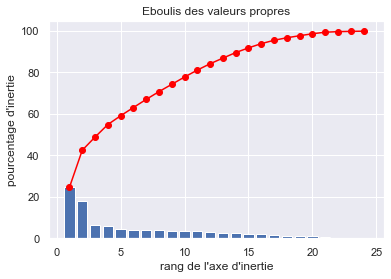

In [221]:
display_scree_plot(pca)

In [222]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

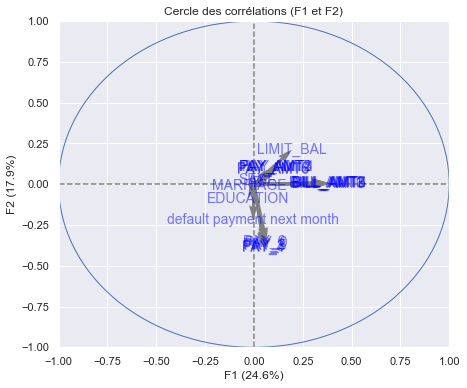

In [223]:
#Cercle de correlation

pcs = pca.components_ 

display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
 # (0,1),(2,3),(4,5) les plans factorielles

In [224]:
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


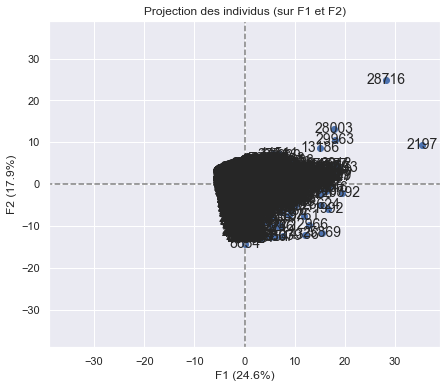

In [225]:
#Projection des individus 
X_projected = pca.transform(X_scaled)# les coordonnées des individus 
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.show()

In [226]:
X_projected = pd.DataFrame(X_projected) 
X_projected.columns =  bank_of_taiwan.columns[1:]
print(X_projected.head()) 

   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0  -1.922829 -1.475769   0.862454 -0.789765 -0.411254 -0.801545  1.402429   
1  -1.595875  0.162723   0.140991 -0.739878 -0.235359 -0.412960  1.712914   
2  -0.920635  0.122147  -0.899483  0.191565 -0.148787 -0.567108  1.950645   
3  -1.268227  1.122357  -0.690609  2.298222 -1.473597  1.303400  1.623663   
4  -0.902586  0.172114   0.184188 -1.053469 -1.892011  0.907920  0.989956   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0  0.753592 -0.877508  0.036118  ...   0.150021  -0.460784  -0.260891   
1  0.498707  0.359350  0.245423  ...   0.552203   0.215428  -0.058755   
2  0.164082  0.049275 -0.088198  ...  -0.649227   0.554228   0.011821   
3 -0.114484  0.073549 -0.171633  ...   0.164742   1.202257   0.131992   
4 -0.081203  0.041176 -0.005288  ...   0.200341   0.975758  -0.025672   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  2.222989  1.041845 -0.365877  

In [227]:
pca.n_components_

24

### Intérprétation
- La première composante principale est relativement importante car elle résume 27.2% de l’inertie totale. La deuxième composante résume 18.1% de l’inertie totale. Le premier plan donne plus que 45% de l’inertie totale
- La variable X13 est la plus corréles postivement avec le 1er axe donc cette composante la plus liés que les autres à cette première composante
- La variable X19 est la plus corréles négativement avec le 2eme axe donc cette composante 
- => L'axe 1 représente au mieux montant du relevé de facture en août 2005 donc les individus d'index 2197 et 28716 ont le plus de montant dans leur relevé de facture en août 2005 , et il oppose l'axe 2 qui represente le mieux le montant payé en septembre 2005 

<p style="color:#FF0000" ;> <font  size="5"> 4- Modeling  </font> </p>

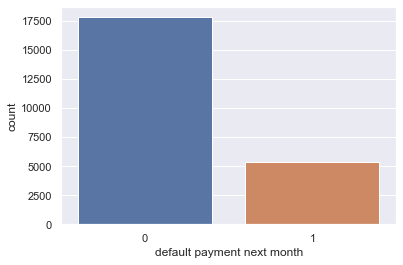

In [228]:
sns.countplot(data=bank_of_taiwan, x="default payment next month")

- On remarque qu'il y a plus de no default payment que default payment

In [229]:
bank_of_taiwan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


<p style="color:#FFD700" ;> <font  size="5"> App non supervisé : Clustering  </font> </p> 

<p style="color:#39ff14" ;> <font  size="4"> K-means (clustering) </font> </p> 

#### On véerifie que k optimale = 2 par la méthode d'elbow

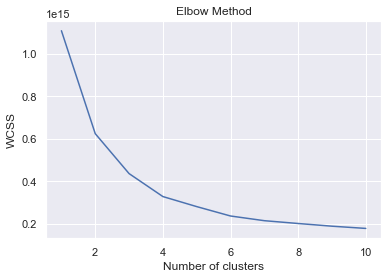

In [230]:
#methode d'Elbow(de coude) pour savoir le nb des clusters optimal
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()    

In [231]:
## Appliquer l'algo
datakmeans = bank_of_taiwan.iloc[:, 0:-1] ## les donnes d'apprentissage  
y = bank_of_taiwan.iloc[:, -1]  ## Target 
kmeans = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(datakmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [232]:
adjusted_rand_score(y,kmeans.labels_)

-0.023448364235128003

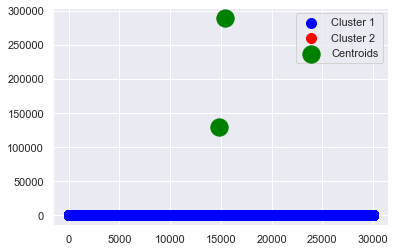

In [233]:
#Affichage du nuage des points qui indique la repartition de chaque cluster
plt.scatter(datakmeans.values[:,0], y, s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(datakmeans.values[kmeans == 1, 0], y.values[kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label = 'Centroids')
plt.title('')
plt.legend()
plt.show()

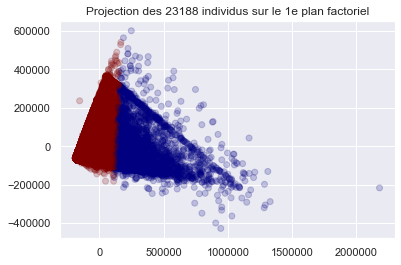

In [234]:
from sklearn import decomposition
clusters = kmeans.labels_
pca = decomposition.PCA(n_components = 2).fit(bank_of_taiwan)
data_projected = pca.transform(bank_of_taiwan)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = clusters.astype(np.float), cmap = 'jet', alpha = .2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(data_projected.shape[0]))
plt.show(block = False)

## Evaluation: Ségumentation via crosstab

In [235]:
#l'affichege de cross table qui nous permet de tirer une conclusion sur la sginification de chaque cluster
pd.crosstab(y, kmeans.labels_)

col_0,0,1
default payment next month,,
0,3132,14691
1,719,4646


- Les personnes qui ont y (default payment next month) = 0 il appartiennet totalement au cluster 0 et ceux qui ont y = 1 appartienet au cluster 1 et 0 mais la totalité dans le cluster 1 

## Comportement d'un cluster

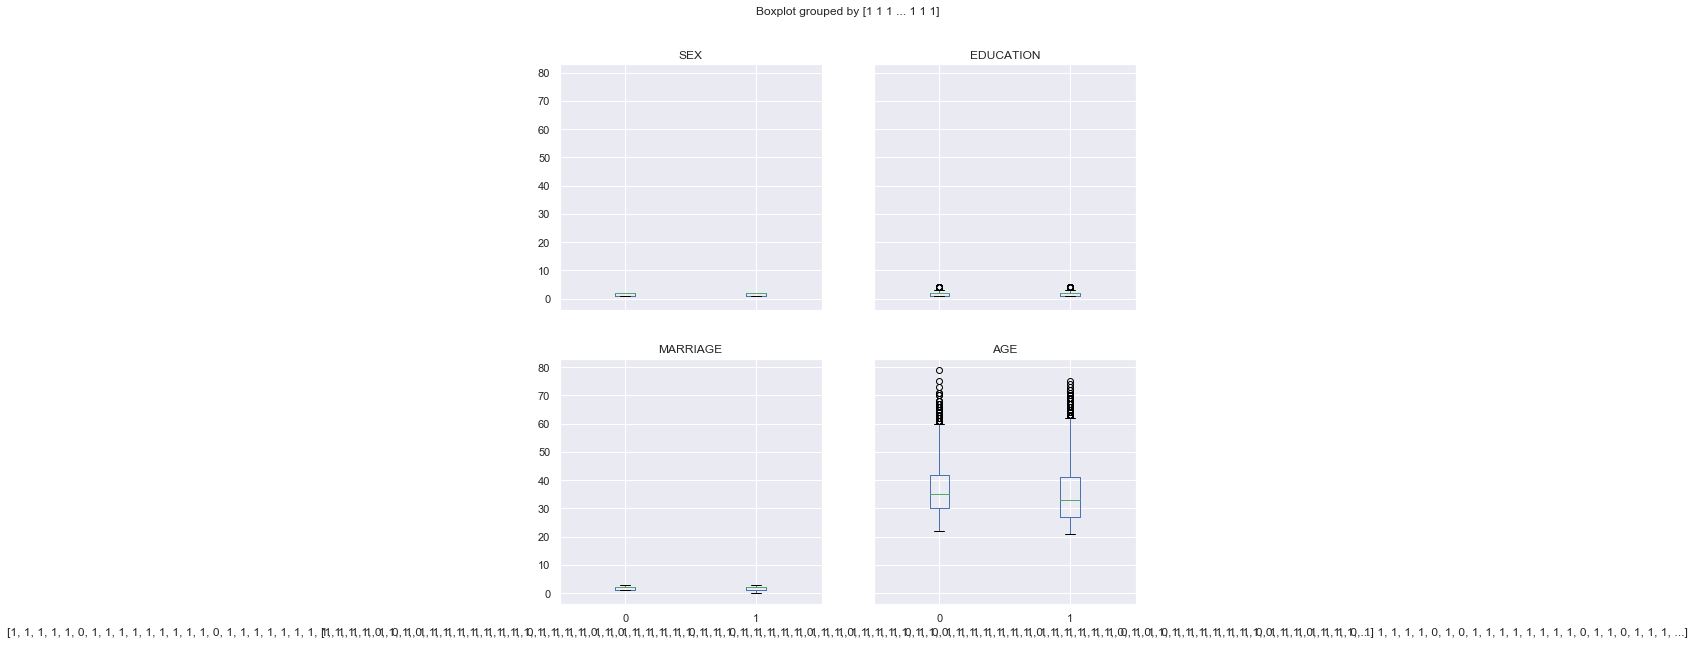

In [236]:
bank_of_taiwan.boxplot(column=['SEX','EDUCATION','MARRIAGE','AGE'],by=kmeans.labels_,figsize=(10,10));

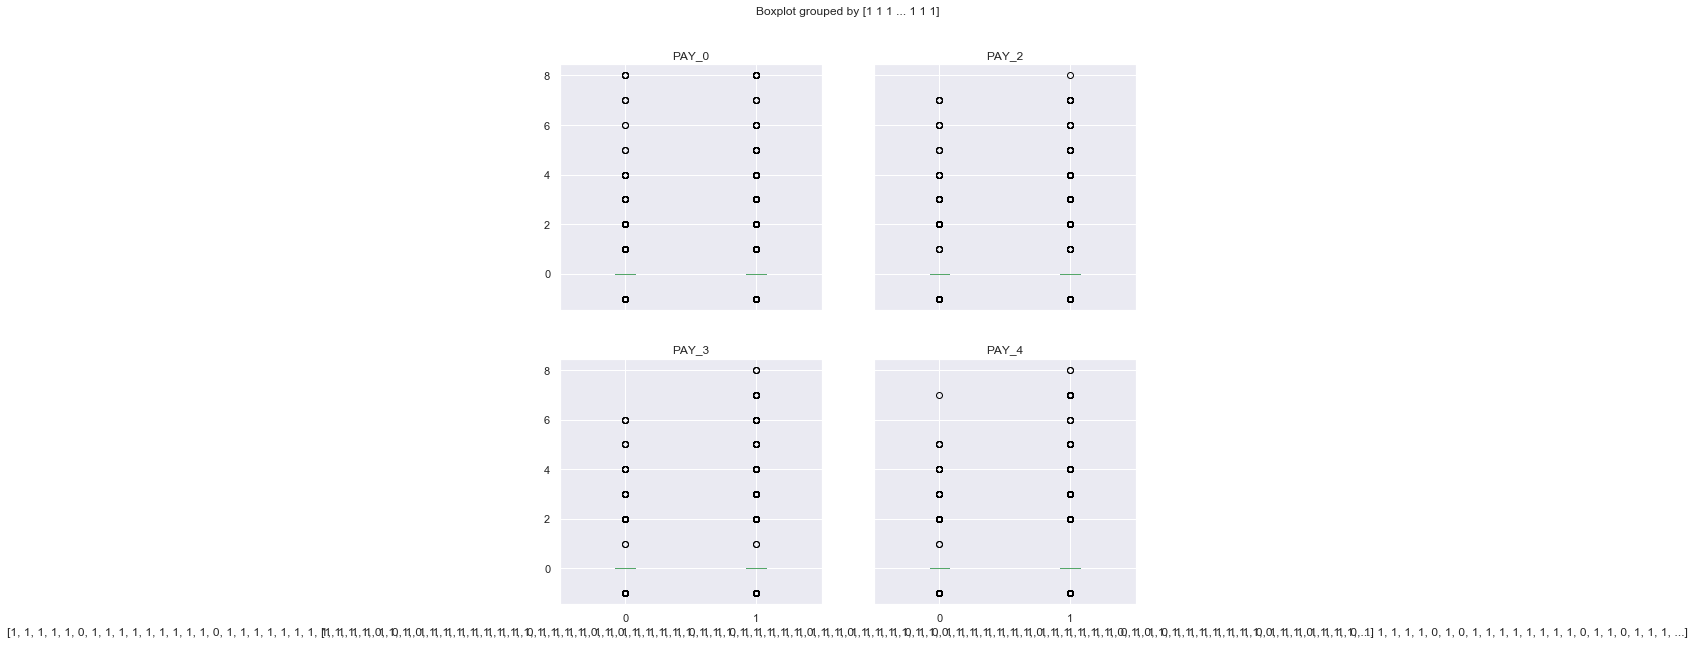

In [237]:
bank_of_taiwan.boxplot(column=['PAY_0','PAY_2','PAY_3','PAY_4'],by=kmeans.labels_,figsize=(10,10));

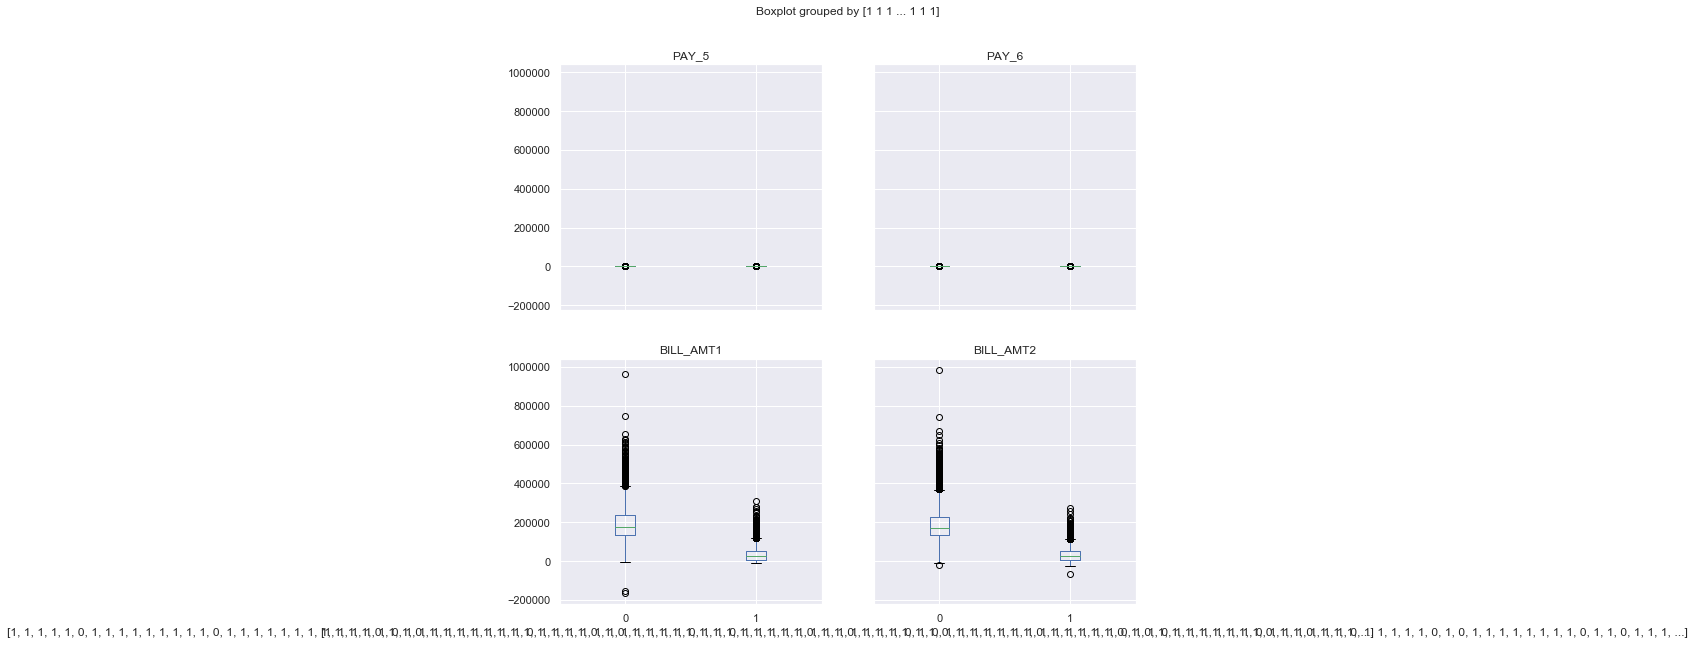

In [238]:
bank_of_taiwan.boxplot(column=['PAY_5','PAY_6','BILL_AMT1','BILL_AMT2'],by=kmeans.labels_,figsize=(10,10));

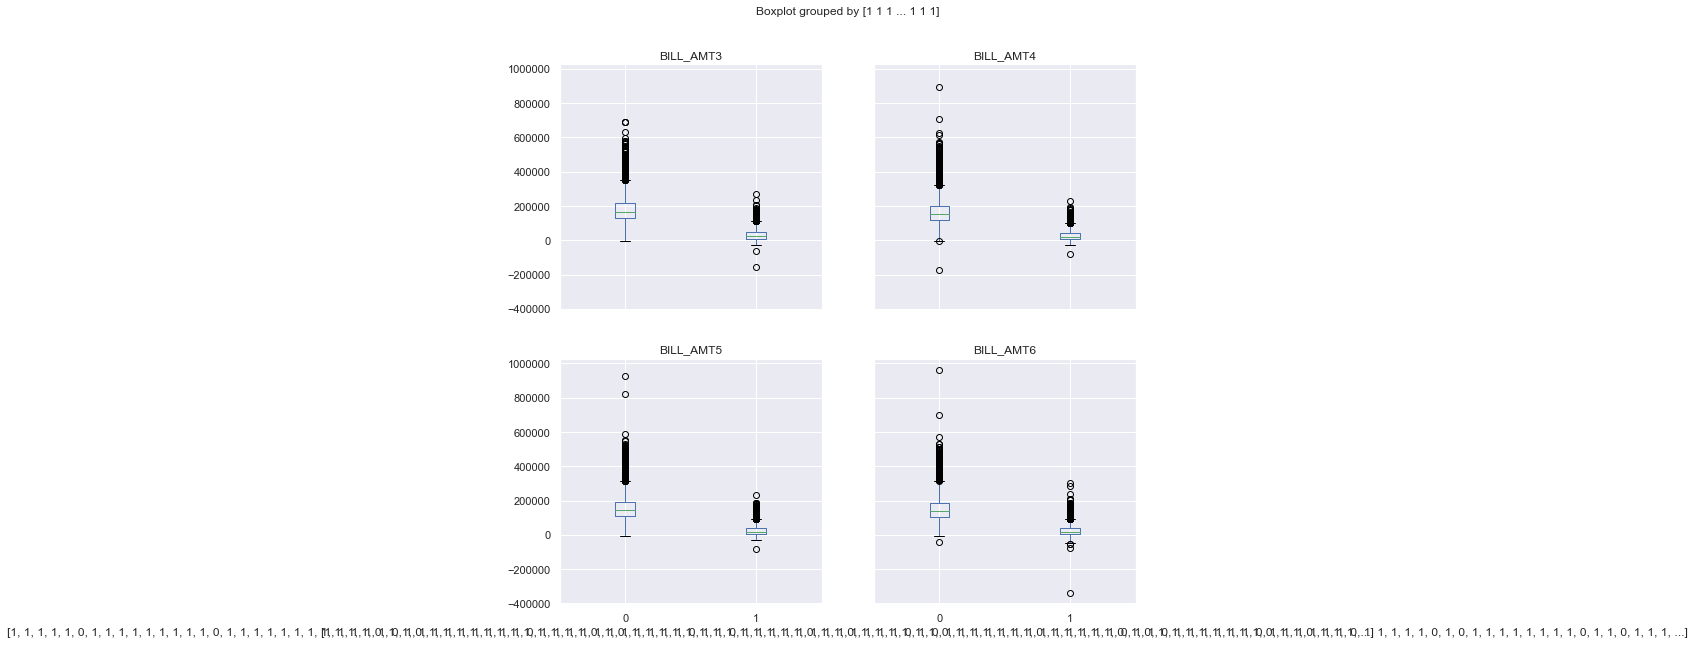

In [239]:
bank_of_taiwan.boxplot(column=['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],by=kmeans.labels_,figsize=(10,10));

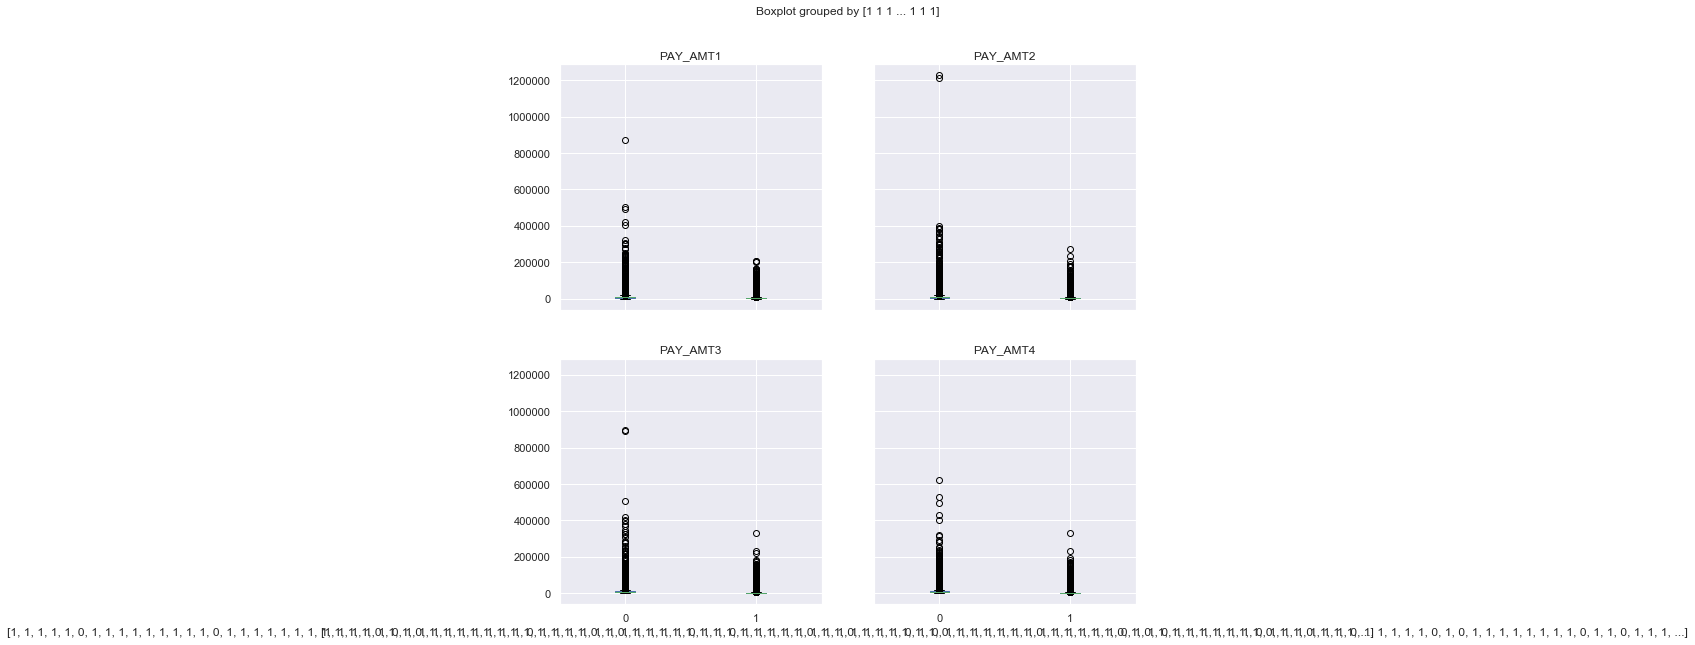

In [240]:
bank_of_taiwan.boxplot(column=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4'],by=kmeans.labels_,figsize=(10,10));

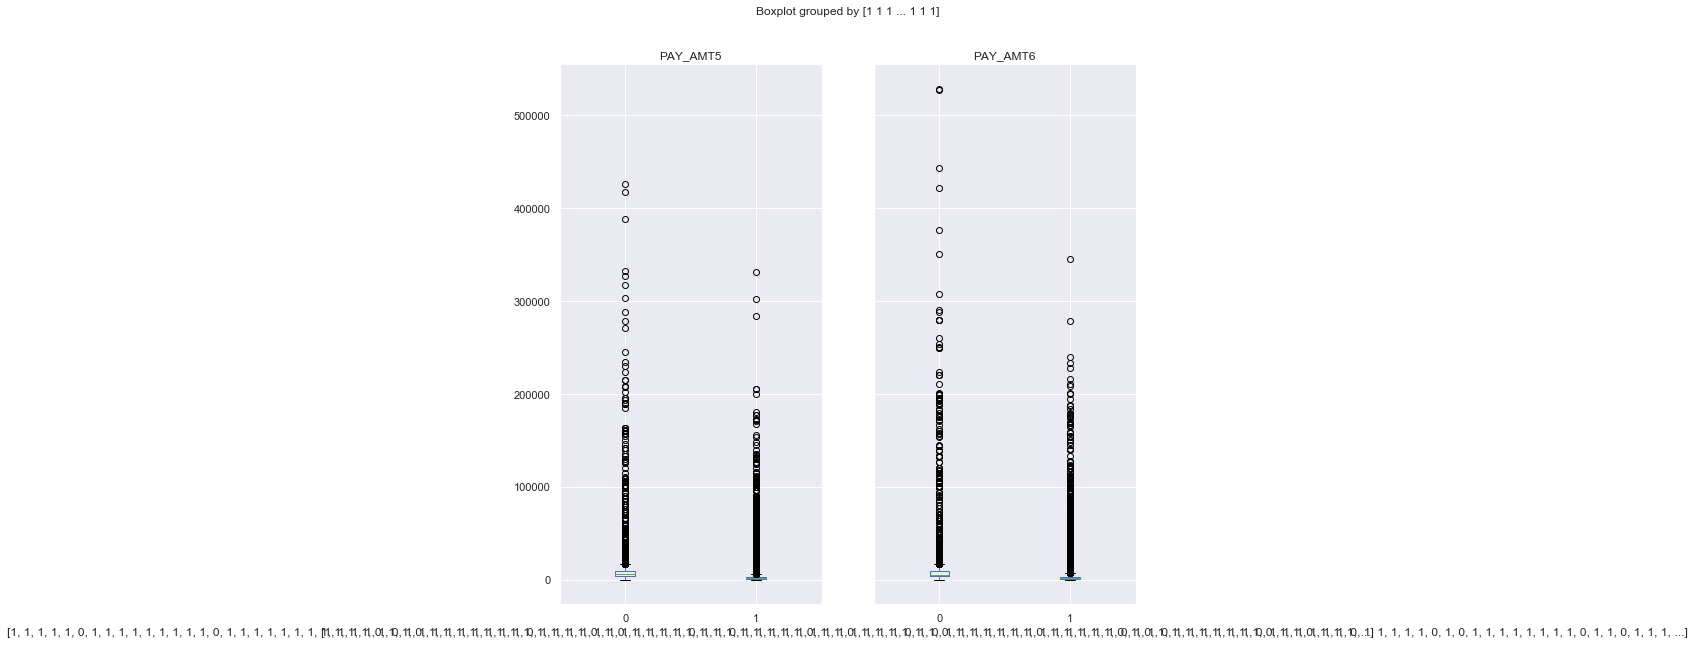

In [241]:
bank_of_taiwan.boxplot(column=['PAY_AMT5','PAY_AMT6'],by=kmeans.labels_,figsize=(10,10));

<p style="color:#39ff14" ;> <font  size="4"> Classification Hiérarchique Ascendante (CAH) </font> </p> 

In [242]:
Z = linkage(bank_of_taiwan.iloc[:,0:23],method='ward',metric='euclidean')
#ici on a choisi la methode 'ward' qui est une methode permettant de regrouper deux classes
#d'une partition pour obtenir une partition plus agrégée

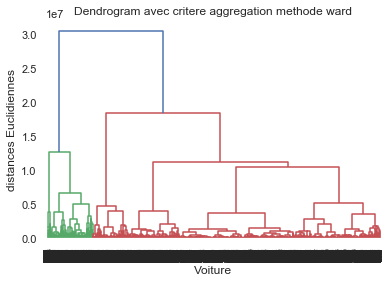

In [243]:
#l'affichage du dendogramme
dendrogram(Z)
plt.title('Dendrogram avec critere aggregation methode ward')
plt.xlabel('Voiture')
plt.ylabel('distances Euclidiennes')
plt.show()

In [244]:
#couper le dendogramme
clusters = fcluster(Z,criterion='distance', t=2.5)

In [245]:
# Crosstab
pd.crosstab(clusters,y)

default payment next month,0,1
row_0,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
23183,1,0
23184,1,0
23185,1,0


<p style="color:#39ff14" ;> <font  size="4"> DBSCAN </font> </p> 

- ***Principe*** : l'algorithme choisit un point arbitraire pour débuter puis il cherche les points qui sont a une distance de eps (pour epsilon) ou moins (ces region sont dites denses) et il affecte a ce cluster et ainsi de suite pour ces voisins : il s'agit d'un core point
-  Dans le cas ou le nbe de point trouves qui sont a une distance de eps ou moins plus petit que "min_samples" alors le point de départ est caractérisé comme noise 
- min_samples : points se trouvant a une distance inférieure à eps à partir d'un point donnée



In [246]:
from sklearn.cluster import DBSCAN
X = bank_of_taiwan.iloc[:, 0:23] ## les donnes d'apprentissage  
y = bank_of_taiwan.iloc[:, -1]  ## Target 

dbscan =DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships : \n {}".format(clusters))

Cluster memberships : 
 [-1 -1 -1 ... -1 -1 -1]


In [247]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


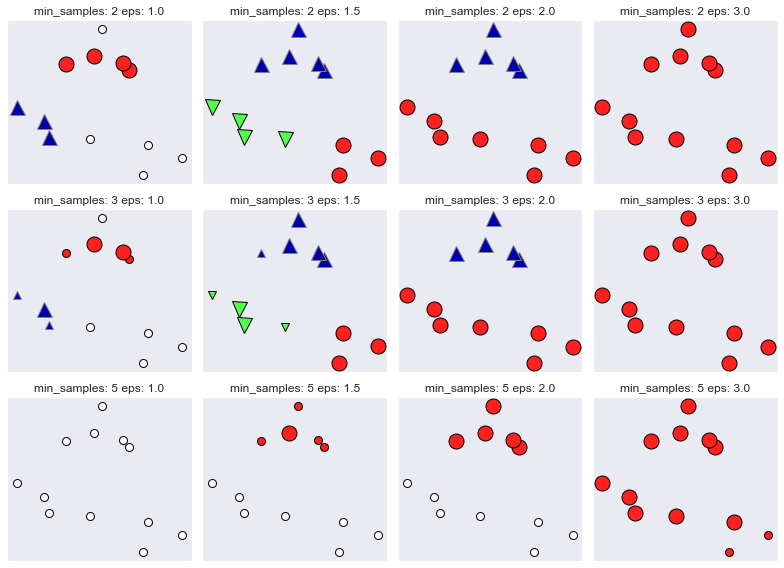

In [248]:
mglearn.plots.plot_dbscan()

In [249]:
# les pts qui appartiennet a un cluster sont pleins tadis que les bruits sont représenté par un cercle creux 
# Plus esp augmente (en allant de gauche à droite ) plus le nbe de points inclus dans un cluster augumente 
# En augmentant la valeur du parametre min_samples (de haut en bas ) on diminue le nbe de points interieure et on augmente donc la quantité du bruit 

Text(0, 0.5, 'Feature 1')

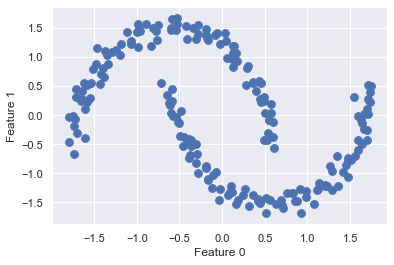

In [250]:
from sklearn.datasets import make_moons
#Visualisation
X, y = make_moons(n_samples=200, noise=0.05 , random_state=0) #fonction make_moons pour Faire deux demi-cercles entrelacés  : A simple toy dataset to visualize clustering and classification algorithms
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


#plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap= mglearn.cm2 , s=60) # Heythi shiha normalement ama tala erreur 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap= mglearn.cm2 , s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- le nuage de point selon la fonction make_moons (pour Faire deux demi-cercles entrelacés) de l'algorithme DBSCAN

<p style="color:#39ff14" ;> <font  size="4"> Birch </font> </p> 

Birch construit ce qu'on appelle l'arbre de caractéristiques (CFT) pour former un ensemble de nœuds de caractéristiques (CFN). À l'intérieur de CFN, il existe des sous-groupes de caractéristiques (CFS) qui contiennent suffisamment d'informations sur les données

- Avantages:
Birch peut gérer de grands ensembles de données;

- Désavantages:<br>
1- Il est nécessaire de spécifier le nombre de clusters; <br>
2- Outre le nombre de clusters, nous devons spécifier deux autres paramètres;
Birch ne fonctionne pas bien sur des données de grande dimension (s'il y a> 20 fonctionnalités, vous feriez mieux d'utiliser autre chose).

In [251]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

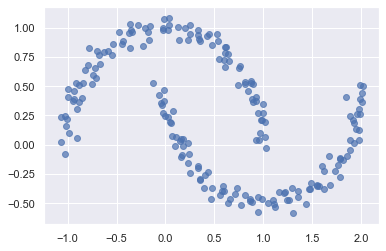

In [252]:
X_Birch, clusters = make_blobs(n_samples=450, centers=2, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

In [253]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(X_Birch)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [254]:
labels = brc.predict(X_Birch)

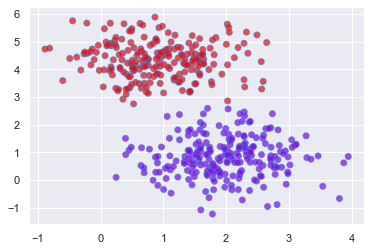

In [255]:
plt.scatter(X_Birch[:,0], X_Birch[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

<p style="color:#39ff14" ;> <font  size="4"> KModes </font> </p>

 - init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao' <br>
 *** Method for initialization:<br>****
 'Huang': Method in Huang [1997, 1998]<br>
  'Cao': Method in Cao et al. [2009]<br>
  'random': choose 'n_clusters' observations (rows) at random from<br>
    #data for the initial centroids.<br>
    #If an ndarray is passed, it should be of shape (n_clusters, n_features)<br>
    #and gives the initial centroids.<br>
 - n_init : int, default: 10
    Number of time the k-modes algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of cost   

In [256]:
y = bank_of_taiwan.iloc[:,-1]
X = bank_of_taiwan.iloc[:,0:23]

In [257]:
from kmodes.kmodes import KModes
kmode = KModes(n_clusters=2, init = "Huang", n_init = 3)
y_pred = kmode.fit_predict(X)

In [258]:
pd.crosstab(y_pred,y)

default payment next month,0,1
row_0,,
0,14112,4366
1,3711,999


In [259]:
adjusted_rand_score(y_pred,y)

-0.010868880986382744

# Evaluer les alghorithmes : Silhouette_score

In [260]:
#Calculate the average of silhouette scores
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters=2, random_state=0)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X,cluster_labels)
silhouette_avg

0.5561578958581781

In [261]:
#Calculate the silhouette score for each data
from sklearn.metrics import silhouette_samples, silhouette_score

each_silhouette_score = silhouette_samples(X,cluster_labels,metric="euclidean")

each_silhouette_score

array([0.72294479, 0.74029916, 0.70935582, ..., 0.71298348, 0.58642099,
       0.70596281])

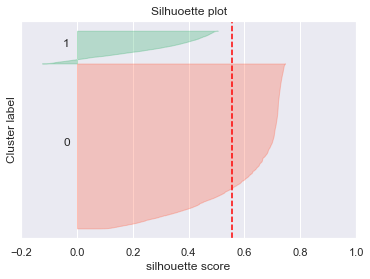

In [262]:
#Visualization

n_clusters=2 # le nbe de clusters dans kmeans 
colorlist = ['tomato', 'mediumseagreen', 'blueviolet', 'cornflowerblue','darkgreen', 'seashell', 'skyblue', 'mediumseagreen']


fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1]);

- Pour n_clusters = 2 la moyenne de silhouette_score est : 0.55 donc le point est en moyenne n'est pas trés proche de son groupe que du groupe voisin : Donc il n'est pas bien classé.

In [263]:
from sklearn import metrics
output = pd.DataFrame(index=['K-Means','DBSCAN','Birch','K-Modes'],
                      columns=['ARI','MI','HCV','FM','SC','CH','DB'])

In [264]:
# Fitting K-Means to data
clust_model = KMeans(n_clusters=2, random_state=0)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['K-Means','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['K-Means','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['K-Means','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['K-Means','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['K-Means','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['K-Means','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['K-Means','DB'] = metrics.davies_bouldin_score(X, labels)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [265]:
# Fitting DBSCAN to data

clust_model = DBSCAN(min_samples=2, eps=10)
clust_model.fit(X)

# Evaluating model's performance
labels = clust_model.labels_
output.loc['DBSCAN','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['DBSCAN','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['DBSCAN','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['DBSCAN','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['DBSCAN','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['DBSCAN','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['DBSCAN','DB'] = metrics.davies_bouldin_score(X, labels)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [266]:
# Fitting Birch to data
clust_model = Birch(n_clusters=2)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['Birch','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['Birch','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['Birch','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['Birch','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['Birch','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['Birch','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['Birch','DB'] = metrics.davies_bouldin_score(X, labels)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [267]:
# Fitting K-Modes to data
clust_model = KModes(n_clusters=2, random_state=0)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['K-Modes','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['K-Modes','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['K-Modes','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['K-Modes','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['K-Modes','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['K-Modes','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['K-Modes','DB'] = metrics.davies_bouldin_score(X, labels)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [268]:
output

,ARI,MI,HCV,FM,SC,CH,DB
K-Means,-0.0233952,0.00228927,0.00213331,0.675526,0.556158,18153.6,0.864574
DBSCAN,0.000139949,-3.95109e-05,2.71565e-05,0.80265,-0.218424,1.51024,0.934625
Birch,-0.0169389,0.00111188,0.00101138,0.694458,0.562975,17105.9,0.829473
K-Modes,-0.0175274,0.00203991,0.00215873,0.618367,0.0764198,280.667,6.89738


In [269]:
# Metrics : 
#  ARI	: Adjusted Rand index
#  MI	: Mutual Information based scores
#  HCV  : Homogeneity, completeness and V-measure
#  FM   : Fowlkes-Mallows scores	
#  SC	: Silhouette Coefficient	
#  CH   : Calinski-Harabaz Index	
#  DB   : Davies-Bouldin Index

# => Comme nous pouvons le voir, la alghorithme Birch est la plus performante

# Classification

In [270]:
# let's get some stats on the 'SalePrice' variable
print("Minimum : {:,.2f}".format(np.min(target)))
print("Maximum : {:,.2f}".format(np.max(target)))
print("Mean : {:,.2f}".format(np.mean(target)))
print("Median : {:,.2f}".format(np.median(target)))
print("Standard deviation : {:,.2f}".format(np.std(target)))

Minimum : 0.00
Maximum : 1.00
Mean : 0.22
Median : 0.00
Standard deviation : 0.42


In [271]:
X = bank_of_taiwan.iloc[:,1:-2] # Input
Y = bank_of_taiwan["default payment next month"] # Output (Target)

#### On décompose les données en données d'entrainement et données de test

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [273]:
print(X_train.shape)
print(y_train.shape)

(17391, 22)
(17391,)


#### On cherche à appliquer KNN, pour celà, on cherche le K optimal (elbow method)

In [274]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erreur')

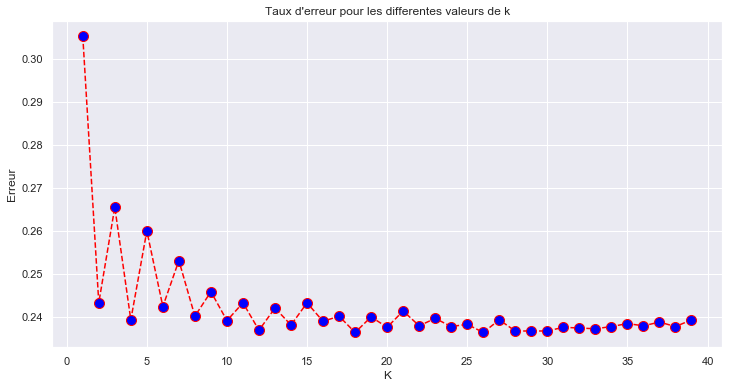

In [275]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')
# 18 est le K optimal graphiquement

In [276]:
knn = KNeighborsClassifier(18)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4436
           1       0.48      0.09      0.15      1361

    accuracy                           0.76      5797
   macro avg       0.63      0.53      0.51      5797
weighted avg       0.71      0.76      0.70      5797



In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

#### On définie une fonction qui va plotter une matrice de confusion

In [8]:
import itertools
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

NameError: name 'plt' is not defined

#### On définie une fonction qui va determiner l'importance de chaque variable pour le modèle appliqué

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

#### On définie une fonction qui va "tuner" les paramètres de chaque modèle qu'on choisi d'appliquer et qui va en retour, nous afficher la matrice de confusion, le rapport de classification, l'importance de chaque feature( pour XGBoost, AdaBoost, DTC) et les paramètres optimaux en utilisant GridSearchCV

In [ ]:
def best_model(model, x_train, y_train, x_test, y_test, grid_params):
    
    grid = GridSearchCV(model, grid_params, return_train_score=True).fit(x_train, y_train)
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_
    preds = estimator.predict(x_test)
    plot_confusion_matrix(y_test, preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(y_test, preds))
    instance = (isinstance(estimator,XGBClassifier) or isinstance(estimator,AdaBoostClassifier) or isinstance(estimator,DecisionTreeClassifier))
    if (instance) : 
        imp = get_feature_importance(estimator,X_train)
    else :
        imp = 0
    F1 = f1_score(y_true = y_test, y_pred = preds)
    print("F1Score : ",F1)
    return estimator, table, params, imp


#### On utilise notre fonction bestmodel pour chauqe modèle qu'on va appliquer. (Ici : kNN)

In [ ]:
kN = KNeighborsClassifier()
est, table, params, imp = best_model(kN, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'n_neighbors':list(range(8,21))}])


In [ ]:
est

In [ ]:
table

In [ ]:
sv = LinearSVC()
est, table, params, imp = best_model(sv, X_train, y_train,
                                X_test,y_test,
                                 grid_params=[{'C':[1, 2, 4, 6, 10,20]}])


In [ ]:
table

In [ ]:
dt = DecisionTreeClassifier()
est, table, params, imp = best_model(dt, X_train,y_train,
                                X_test,y_test,
                                grid_params=[{'max_depth':list(range(4,15))}])

In [ ]:
est

In [ ]:
imp

In [ ]:
table

In [ ]:
params

In [ ]:
gnb = GaussianNB()
est, table, params, imp = best_model(gnb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5,
                                                               1e-6, 1e-7, 1e-8, 1e-9]}])


In [ ]:
table

In [ ]:
est

In [ ]:
params

In [ ]:
xgb = XGBClassifier(learning_rate=0.05)
est, table, params, imp = best_model(xgb, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

In [ ]:
est

In [ ]:
table

In [ ]:
params

In [ ]:
imp

In [ ]:
adab = AdaBoostClassifier(learning_rate=0.05)
est, table, params, imp = best_model(adab, X_train, y_train,
                                X_test,y_test,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])

In [ ]:
est

In [ ]:
table

In [ ]:
imp

In [ ]:
params

## Evaluation de nos algorithmes : 
#### AdaBoost :
##### Accuracy : 0.81
##### F1 Score : 0.49
##### <hr>
#### XGBoost :
##### Accuracy : 0.82
##### F1 Score : 0.51
##### <hr>
#### NBGaussian :
##### Accuracy : 0.48
##### F1 Score : 0.41
##### <hr>
#### DecisionTree :
##### Accuracy : 0.81
##### F1 Score : 0.81
##### <hr>
#### LinearSVC :
##### Accuracy : 0.73
##### F1 Score : 0.81
##### <hr>
#### KNN :
##### Accuracy : 0.76
##### F1 Score : 0.81


In [ ]:
def_pay_1 = bank_of_taiwan[bank_of_taiwan["default payment next month"] == 1]
def_pay_0 = bank_of_taiwan[bank_of_taiwan["default payment next month"] == 0]
print("Nombre de defpay = 0 :",def_pay_0["default payment next month"].count())
print("***************************************")
print("Nombre de defpay = 1 :",def_pay_1["default payment next month"].count())

### On remarque un déséquilibre au niveau de nos données; Une majorité default payment pour le mois prochain et une minorité non default payment

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
X_test_SMOTE, y_test_SMOTE = sm.fit_sample(X_test,y_test)
print(len(y_SMOTE))
print(len(X_SMOTE))
print(len(y_test_SMOTE))
print(len(X_test_SMOTE))

#### On obtient un équilibre dans nos données (X_SMOTE = 26774, Y_SMOTE = 26774 pour les données d'entrainement) (X_test_SMOTE = 8872, y_test_SMOTE = 8872 pour les données de test) 

In [ ]:
kN = KNeighborsClassifier()
est, table, params, imp = best_model(kN, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                 grid_params=[{'n_neighbors':list(range(8,21))}])
estKNN = est

In [ ]:
sv = LinearSVC()
est, table, params, imp = best_model(sv, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                 grid_params=[{'C':[1, 2, 4, 6, 10,20]}])
estsv = est

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
est, table, params, imp = best_model(dt, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                grid_params=[{'max_depth':list(range(4,15))}])
estDTC = est

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
est, table, params, imp = best_model(gnb, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                grid_params=[{'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5,
                                                               1e-6, 1e-7, 1e-8, 1e-9]}])
estGNB = est

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.05)
est, table, params, imp = best_model(xgb, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])
estXGB = est

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(learning_rate=0.05)
est, table, params, imp = best_model(adab, X_SMOTE, y_SMOTE,
                                X_test_SMOTE,y_test_SMOTE,
                                grid_params=[{'n_estimators':[100, 200, 400, 800, 1000]}])
estAda = est

In [ ]:
est = [estAda,estXGB,estGNB,estDTC,estsv,estKNN]
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm', 'brown', 'r']
lw = 1
couleur = 0
plt.figure(figsize=(12,8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for different classifiers')
for e in est : 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    fpr, tpr, _ = roc_curve(y_test_SMOTE, e.predict(X_test_SMOTE))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=colors[couleur])
    couleur += 1

## Evaluation de nos algorithmes : 
#### AdaBoost :
##### Accuracy : 0.77
##### F1 Score : 0.75
##### <hr>
#### XGBoost :
##### Accuracy : 0.80
##### F1 Score : 0.80
##### <hr>
#### NBGaussian :
##### Accuracy : 0.55
##### F1 Score : 0.68
##### <hr>
#### DecisionTree :
##### Accuracy : 0.74
##### F1 Score : 0.73
##### <hr>
#### LinearSVC :
##### Accuracy : 0.53
##### F1 Score : 0.15
##### <hr>
#### KNN :
##### Accuracy : 0.60
##### F1 Score : 0.56


### D'après la courbe ROC, l'indice Accuracy et l'indice F1 Score, l'algorithme XGBoost est le plus précis. (Accuracy = 0.80, F1 Score = 0.80) 
### C'est donc l'algorithme qu'on va adopter.